In [61]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

# scale back and remmove negative values
# apply gradient dexcent attack on benign sample -> scale back + delta + modify sample by adding bytes

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [62]:
data = pd.read_csv('PDFMalware2022.csv').dropna()
data.columns

Index(['Fine name', 'pdfsize', 'metadata size', 'pages', 'xref Length',
       'title characters', 'isEncrypted', 'embedded files', 'images', 'text',
       'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer',
       'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA',
       'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch',
       'EmbeddedFile', 'XFA', 'Colors', 'Class'],
      dtype='object')

In [63]:
new_labels = {'Malicious': 1, 'Benign': 0}
data['Class'] = data['Class'].map(new_labels)


new_labels = {'1(1)': '1', '2(1)': '2', '3(1)': '3', '29(2)': '29', '34(2)': '34', '2(2)': '2', '>': '-1', '53(1)': '53', '5(1)': '5', '12(2)': '2', '53(2)': '53', 
              '(most': '0', '_Pro_Rodeo_Pix_': '0', "_Pro_Rodeo_Pix_'": '0', 'pdfid.py': '0', 'pdfHeader)': '0', 'bytes[endHeader]': '0', 'list': 0}

for col in data.drop(columns=['Class']).columns:
    data[col] = data[col].replace(new_labels)

data.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,1
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,1
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,1
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,1
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,1


In [64]:
data.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors,Class
count,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.225581,334.130101,3.398583,2728.630650,51.487479,-0.020852,-0.006485,17.341215,1.203532,-0.043500,1.516811,2.087000,0.554225
std,444.239972,1566.007897,11.903610,18108.388189,1354.775001,0.206809,0.257123,35.330169,1.370455,0.256045,7.633485,58.178074,0.497076
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000,1.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000,1.000000


In [65]:
class_data = data.drop(columns=['Fine name', 'text', 'header', 'Class'])

x_train, x_test, y_train, y_test = train_test_split(class_data, data['Class'], test_size=0.2, random_state=77)
x_train.shape

(8018, 29)

In [66]:
# Normalize features
normalizer = StandardScaler()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

pd.DataFrame(x_train, columns=class_data.columns).head()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,obj,endobj,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
0,-0.108711,-0.022830,-0.030364,-0.148392,-0.035008,0.101807,0.025204,-0.139298,-0.125857,-0.078291,...,-0.171897,-0.046573,-0.452136,-0.455689,0.034029,0.190768,0.15755,-0.236492,0.005444,-0.034800
1,-0.015573,0.025352,-0.123076,-0.129669,-0.029055,0.101807,0.025204,-0.139298,0.076204,0.032580,...,-0.171897,-0.046573,-0.452136,2.241776,0.034029,0.190768,0.15755,3.600986,0.005444,-0.034800
2,-0.158020,-0.042705,-0.215787,-0.149562,-0.040301,0.101807,0.025204,-0.075570,-0.286111,-0.166223,...,0.021382,-0.046573,1.326680,-0.455689,0.034029,0.190768,0.15755,-0.236492,0.005444,-0.034800
3,0.647355,0.031977,0.062347,-0.121422,-0.020455,0.101807,0.025204,-0.139298,0.912316,0.491356,...,0.214660,-0.046573,-0.452136,0.893043,0.034029,0.190768,0.15755,-0.236492,0.005444,-0.034800
4,-0.144323,0.119307,0.062347,-0.132567,0.010638,0.101807,0.025204,-0.139298,6.904454,3.779253,...,-0.171897,-0.046573,-0.452136,-0.455689,0.034029,0.190768,0.15755,-0.236492,0.005444,-0.003953


In [67]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print(f"""Naive Bayes scores
      accuracy score: {nb_accuracy}
      precision score: {nb_precision}
      recall score: {nb_recall}
      f1 score: {nb_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")


Naive Bayes scores
      accuracy score: 0.6224438902743142
      precision score: 0.9558823529411765
      recall score: 0.3454384410983171
      f1 score: 0.3454384410983171

Confusion matrix:
[[858  18]
 [739 390]]


In [68]:
tree = DecisionTreeClassifier(max_depth=100)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print(f"""Decision tree scores
      accuracy score: {dt_accuracy}
      precision score: {dt_precision}
      recall score: {dt_recall}
      f1 score: {dt_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Decision tree scores
      accuracy score: 0.9885286783042394
      precision score: 0.9885159010600707
      recall score: 0.9911426040744021
      f1 score: 0.9898275099513489

Confusion matrix:
[[ 863   13]
 [  10 1119]]


In [69]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"""Random forest scores
      accuracy score: {rf_accuracy}
      precision score: {rf_precision}
      recall score: {rf_recall}
      f1 score: {rf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Random forest scores
      accuracy score: 0.9930174563591022
      precision score: 0.9946761313220941
      recall score: 0.9929140832595217
      f1 score: 0.9937943262411347

Confusion matrix:
[[ 870    6]
 [   8 1121]]


In [70]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"""KNN scores
      accuracy score: {knn_accuracy}
      precision score: {knn_precision}
      recall score: {knn_recall}
      f1 score: {knn_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

KNN scores
      accuracy score: 0.9860349127182045
      precision score: 0.9884649511978705
      recall score: 0.9867139061116031
      f1 score: 0.9867139061116031

Confusion matrix:
[[ 863   13]
 [  15 1114]]


In [71]:
hidden_layers = (128,)
activation = 'tanh'
solver = 'adam'

mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)

print(f"""MLP scores
      accuracy score: {mlp_accuracy}
      precision score: {mlp_precision}
      recall score: {mlp_recall}
      f1 score: {mlp_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

MLP scores
      accuracy score: 0.9905236907730673
      precision score: 0.9946524064171123
      recall score: 0.9884853852967228
      f1 score: 0.9884853852967228

Confusion matrix:
[[ 870    6]
 [  13 1116]]


/home/paul/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [72]:
test_data_svm = data.sample(frac=1).reset_index(drop=True)[:4000]
# print(test_data_svm['Class'])
used_data_svm = test_data_svm.drop(columns=['Fine name', 'text', 'header', 'Class'])
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(used_data_svm, test_data_svm['Class'], test_size=0.2, random_state=69)

x_train_svm = normalizer.fit_transform(x_train_svm)
x_test_svm = normalizer.transform(x_test_svm)

C_values = [1, 0.8, 0.5, 0.3, 0.1]
for c in C_values:
    svc = SVC(kernel='linear', C=c)
    svc.fit(x_train_svm, y_train_svm)
    y_pred = svc.predict(x_test_svm)
    print(f"C = {c}, F1: {f1_score(y_test_svm, y_pred)}")

C = 1, F1: 0.955503512880562
C = 0.8, F1: 0.9567251461988304
C = 0.5, F1: 0.9567251461988304
C = 0.3, F1: 0.9591598599766628
C = 0.1, F1: 0.9591598599766628


In [73]:
# SVM
# svc = SVC(kernel='linear')
# svc.fit(x_train, y_train)
svc = SVC(kernel='linear', C=1)
svc.fit(x_train_svm, y_train_svm)

y_pred = svc.predict(x_test_svm)

svm_accuracy = accuracy_score(y_test_svm, y_pred)
svm_precision = precision_score(y_test_svm, y_pred)
svm_recall = recall_score(y_test_svm, y_pred)
svm_f1 = f1_score(y_test_svm, y_pred)

print(f"""SVM scores
      accuracy score: {svm_accuracy}
      precision score: {svm_precision}
      recall score: {svm_recall}
      f1 score: {svm_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test_svm, y_pred)}")


SVM scores
      accuracy score: 0.9525
      precision score: 0.9902912621359223
      recall score: 0.9230769230769231
      f1 score: 0.955503512880562

Confusion matrix:
[[354   4]
 [ 34 408]]


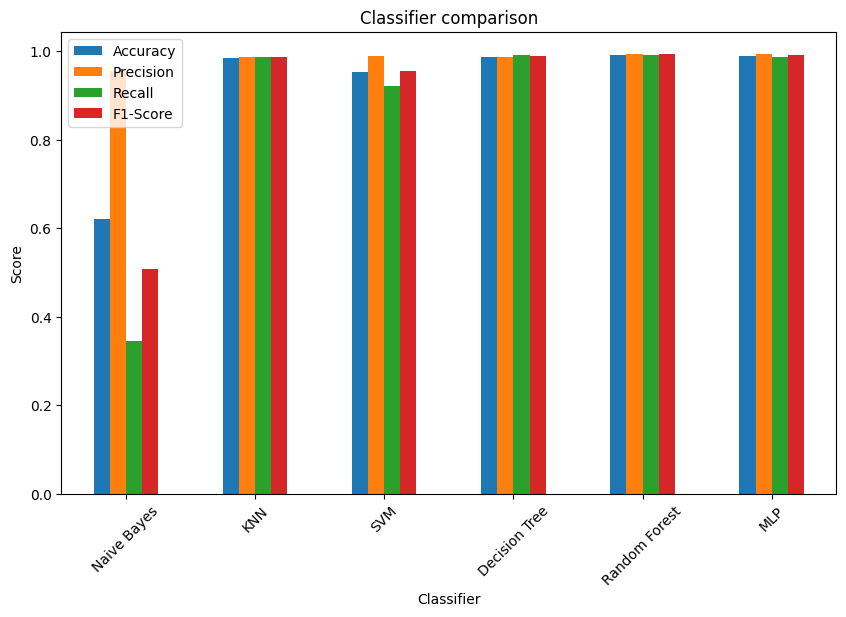

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Classifier": ["Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest", "MLP"],
    "Accuracy": [nb_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy],
    "Precision": [nb_precision, knn_precision, svm_precision, dt_precision, rf_precision, mlp_precision],
    "Recall": [nb_recall, knn_recall, svm_recall, dt_recall, rf_recall, mlp_recall],
    "F1-Score": [nb_f1, knn_f1, svm_f1, dt_f1, rf_f1, mlp_f1]
}
df_results = pd.DataFrame(results)

##Code to display the results
df_results.plot(kind='bar', x='Classifier', figsize=(10, 6))
plt.title('Classifier comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_4713/2332541769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

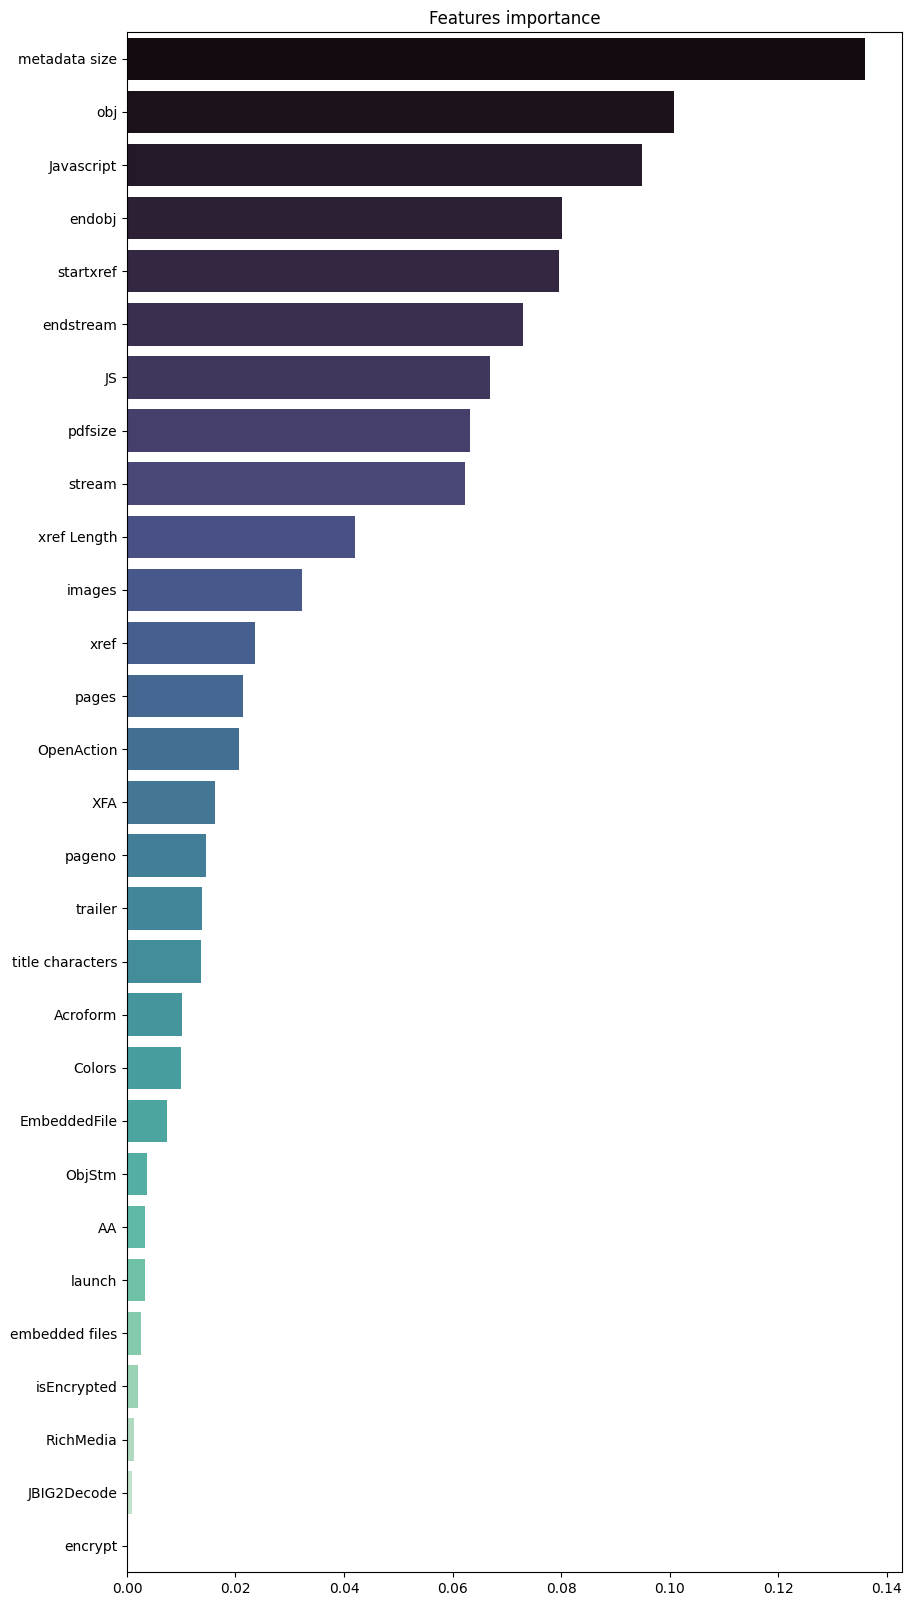

In [75]:
# Feature importance
importance = rf.feature_importances_
importance_dict = {class_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')



In [76]:
def evasion_gradient_descent(x0, gradient, t, epsilon, max_iter):

    m = 0
    x_m = x0
    for i in range(max_iter):

        m += 1
        x_m = x_m - t * gradient
        # print(f"Iteration {i}...")
        if np.linalg.norm(x_m - x0) < epsilon:
            break

    x = x_m
    return x_m


def rbf_kernel(x, x_i, gamma=0.0001):
    return np.exp(- gamma * np.pow(np.linalg.norm(x - x_i), 2))

def poly_kernel(x, x_i, d=3, c=1):
    return np.pow((x @ x_i) + c, d)

def gradient_rbf_kernel(x, x_i, gamma):
    return -2 * gamma * np.exp(- gamma * np.pow(np.linalg.norm(x - x_i), 2)) * (x - x_i)

def gradient_poly_kernel(x, x_i, d, c):
    return d * np.pow(d * (x @ x_i + c), d - 1) * x_i

def evasion_gradient_descent_with_kernel(x0, y, gradient, t, h, l, epsilon, max_iter):

    m = 0
    x_m = x0

    for i in range(max_iter):

        estimator = delta_f = np.zeros(gradient.shape[0])
        for i in range(y.shape[0]):
            estimator += 0

        x_m = x_m - t * gradient 
        print(f"Iteration {i}...")
        if np.linalg.norm(x_m - x0) < epsilon:
            break
        m += 1

    x = x_m
    return x_m


In [77]:
malicious_sample = class_data[data['Class'] == 1].iloc[-3:-2]
print(malicious_sample.iloc[0])
pred = mlp.predict(malicious_sample)
pred

pdfsize               4.0
metadata size       377.0
pages                 2.0
xref Length          13.0
title characters     11.0
isEncrypted           0.0
embedded files        0.0
images                  0
obj                     8
endobj                  8
stream                2.0
endstream               2
xref                    1
trailer               1.0
startxref               1
pageno                  1
encrypt               0.0
ObjStm                0.0
JS                      1
Javascript              1
AA                      0
OpenAction              1
Acroform                0
JBIG2Decode             0
RichMedia               0
launch                  0
EmbeddedFile            0
XFA                     0
Colors                0.0
Name: 10023, dtype: object


/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


array([1])

In [78]:
# SVM
gamma_values = [1, 1/1000, 1/x_train_svm.shape[0], 1/10**6]
for g in gamma_values:
     svc_rbf = SVC(kernel='rbf', gamma=g)
     svc_rbf.fit(x_train_svm, y_train_svm)
     y_pred = svc_rbf.predict(x_test_svm)
     print(f"Gamma = {g}, F1: {f1_score(y_test_svm, y_pred)}")

svc_rbf = SVC(kernel='rbf', gamma=0.001)
svc_rbf.fit(x_train_svm, y_train_svm)

y_pred = svc_rbf.predict(x_test_svm)

svm_rbf_accuracy = accuracy_score(y_test_svm, y_pred)
svm_rbf_precision = precision_score(y_test_svm, y_pred)
svm_rbf_recall = recall_score(y_test_svm, y_pred)
svm_rbf_f1 = f1_score(y_test_svm, y_pred)

print(f"""\nSVM with rbf kernel scores
      accuracy score: {svm_rbf_accuracy}
      precision score: {svm_rbf_precision}
      recall score: {svm_rbf_recall}
      f1 score: {svm_rbf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test_svm, y_pred)}")

Gamma = 1, F1: 0.9540636042402827
Gamma = 0.001, F1: 0.962877030162413
Gamma = 0.0003125, F1: 0.9244249726177437
Gamma = 1e-06, F1: 0.711755233494364

SVM with rbf kernel scores
      accuracy score: 0.96
      precision score: 0.9880952380952381
      recall score: 0.9389140271493213
      f1 score: 0.962877030162413

Confusion matrix:
[[353   5]
 [ 27 415]]


In [79]:
coef_values = [0, 5, 10]
degrees = [1, 2, 4, 7]

for c in coef_values:
    for d in degrees:
       svc_poly = SVC(kernel='poly', coef0=c, degree=d)
       svc_poly.fit(x_train_svm, y_train_svm)
       y_pred = svc_poly.predict(x_test_svm)
       print(f"Constant = {c}, degree = {d}, F1: {f1_score(y_test_svm, y_pred)}")
print()


svc_poly = SVC(kernel='poly', coef0=5, degree=7)
svc_poly.fit(x_train_svm, y_train_svm)
y_pred = svc_poly.predict(x_test_svm)

svm_poly_accuracy = accuracy_score(y_test_svm, y_pred)
svm_poly_precision = precision_score(y_test_svm, y_pred)
svm_poly_recall = recall_score(y_test_svm, y_pred)
svm_poly_f1 = f1_score(y_test_svm, y_pred)

print(f"""SVM with rbf kernel scores
      accuracy score: {svm_poly_accuracy}
      precision score: {svm_poly_precision}
      recall score: {svm_poly_recall}
      f1 score: {svm_poly_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test_svm, y_pred)}")

Constant = 0, degree = 1, F1: 0.958041958041958
Constant = 0, degree = 2, F1: 0.9517241379310345
Constant = 0, degree = 4, F1: 0.7666666666666667
Constant = 0, degree = 7, F1: 0.7538994800693241
Constant = 5, degree = 1, F1: 0.958041958041958
Constant = 5, degree = 2, F1: 0.9758342922899885
Constant = 5, degree = 4, F1: 0.9863325740318907
Constant = 5, degree = 7, F1: 0.9703872437357631
Constant = 10, degree = 1, F1: 0.958041958041958
Constant = 10, degree = 2, F1: 0.9758342922899885
Constant = 10, degree = 4, F1: 0.981859410430839
Constant = 10, degree = 7, F1: 0.9660633484162896

SVM with rbf kernel scores
      accuracy score: 0.9675
      precision score: 0.9770642201834863
      recall score: 0.9638009049773756
      f1 score: 0.9703872437357631

Confusion matrix:
[[348  10]
 [ 16 426]]


In [80]:
def svm_gradient(weights, feature_vector=None, support_vectors=None, kernel='linear', gamma=0.001, d=3, c=0):
    if kernel == 'linear':
        return weights
    
    delta_g = np.zeros(feature_vector.shape)
    kernel_gradient = np.zeros(feature_vector.shape)
    for i in range(support_vectors.shape[0]):
        w_i = weights[i]
        x_i = support_vectors[i]
        if kernel == 'rbf':
            kernel_gradient = gradient_rbf_kernel(feature_vector, x_i, gamma)
        elif kernel == 'poly':
            kernel_gradient = gradient_poly_kernel(feature_vector, x_i, d, c)
        # print(f"delta_g: {delta_g.shape}, weights: {weights.shape}, kernel_gradient: {kernel_gradient.shape}")
        delta_g = delta_g + w_i * kernel_gradient
    return delta_g

In [81]:
x = malicious_sample.iloc[0].to_numpy().astype(int)
x = normalizer.fit_transform([x])[0]

weights_linear = svc.coef_[0]
bias_linear = svc.intercept_
print(f"x: {x.shape}")

gradient_linear = weights_linear
print(f"Linear weights:\n{gradient_linear}")

gamma = svc_rbf.get_params()['gamma']
weights_rbf = svc_rbf.dual_coef_[0]
# print(f"{x_train_svm.iloc[svc_rbf.support_].head()}")
support_vectors_rbf = svc_rbf.support_vectors_ # x_train_svm.iloc[svc_rbf.support_].to_numpy().astype(int)
print(f"Gamma: {gamma}, Weights: {weights_rbf.shape}, Support Vectors: {support_vectors_rbf.shape}")

rbf_gradient = svm_gradient(
    weights=weights_rbf,
    feature_vector=x,
    support_vectors=support_vectors_rbf,
    kernel='rbf',
    gamma=gamma
    )
print(f"RBF gradient: {rbf_gradient.shape}\n{rbf_gradient}")


d = svc_poly.get_params()['degree']
c = svc_poly.get_params()['coef0']
weights_poly = svc_poly.dual_coef_[0]
support_vectors_poly = svc_poly.support_vectors_ # x_train_svm.iloc[svc_poly.support_].to_numpy().astype(int)
print(f"Degree: {d}, Constant: {c}, Weights: {weights_poly.shape}, Support Vectors: {support_vectors_poly.shape}")

poly_gradient = svm_gradient(
    weights=weights_poly,
    feature_vector=x,
    support_vectors=support_vectors_poly,
    kernel='poly',
    d=d,
    c=c
    )
print(f"Poly gradient: {poly_gradient.shape}\n{poly_gradient}")

x: (29,)
Linear weights:
[-3.98651629e-02 -3.17364393e-04 -1.73775949e-03  4.63399858e-01
  1.77791920e-01 -7.49976220e-01  3.06670420e-01 -1.05609797e-01
 -9.99131690e-01 -1.00826019e+00 -1.65748147e-01 -4.07689778e-01
 -1.95458887e+00  1.27241058e+00  5.30249089e-01  1.04495232e-01
 -4.64416516e-01 -5.97934481e-01 -2.06742892e+00  3.06271049e+00
 -2.22859786e+00  8.44590404e-01  7.94198287e-02 -1.94880226e+00
 -9.14584383e-02  1.44176284e-01  1.88587082e-01  5.55773618e-01
  4.80587706e-01]
Gamma: 0.001, Weights: (1300,), Support Vectors: (1300, 29)
RBF gradient: (29,)
[-0.01938712 -0.02348141 -0.08327702  0.07258097  0.01089996 -0.22112908
  0.01962793 -0.17927852 -0.17022412 -0.16915366 -0.20505723 -0.20466081
 -0.3665065  -0.05548074 -0.35393721 -0.09813678 -0.10929109 -0.22367549
  0.30530013  0.45236407 -0.03417858  0.38140648 -0.06403933 -0.07257922
 -0.09355985  0.01554767  0.17107006  0.18842432  0.061569  ]
Degree: 7, Constant: 5, Weights: (145,), Support Vectors: (145, 29)


In [82]:
modified = evasion_gradient_descent(
    malicious_sample.iloc[0].to_numpy().astype(int),
    gradient_linear,
    0.01,
    0.00001,
    500
    )
modified

array([  4.19932581, 377.00158682,   2.0086888 ,  10.68300071,
        10.1110404 ,   3.7498811 ,  -1.5333521 ,   0.52804899,
        12.99565845,  13.04130093,   2.82874073,   4.03844889,
        10.77294436,  -5.36205292,  -1.65124544,   0.47752384,
         2.32208258,   2.98967241,  11.3371446 , -14.31355244,
        11.14298928,  -3.22295202,  -0.39709914,   9.74401129,
         0.45729219,  -0.72088142,  -0.94293541,  -2.77886809,
        -2.40293853])

In [83]:
modified_sample = pd.DataFrame([modified], columns=class_data.columns)
cl = svc.predict(modified_sample)
print(f"Predicted class: {cl}")

Predicted class: [0]


/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [84]:
malicious_samples = class_data[data['Class'] == 1]
x_malicious_samples = malicious_samples.to_numpy().astype(int)
modified = np.zeros(x_malicious_samples.shape)

x_malicious_samples = normalizer.fit_transform(x_malicious_samples)

for i in range (len(x_malicious_samples)):
    # grad_i = svm_gradient(weights=weights_rbf,feature_vector=x,support_vectors=support_vectors_rbf,kernel='rbf',gamma=gamma)
    # grad_i = svm_gradient(weights=weights_poly,feature_vector=x,support_vectors=support_vectors_poly,kernel='poly',d=d,c=c)
    grad_i = gradient_linear
    modified[i] = evasion_gradient_descent(
        x0=x_malicious_samples[i],
        gradient=grad_i,
        t=0.001,
        epsilon=0.00001,
        max_iter=300
        )

modified_samples = pd.DataFrame(modified, columns=class_data.columns)
cl = svc_rbf.predict(modified_samples)
modified_samples['Class'] = cl
modified_samples

/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,obj,endobj,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,-0.135613,-0.079279,-0.083699,-0.334659,-0.098497,0.397782,-0.059006,-0.004410,0.111438,0.268075,...,0.704732,0.597535,-0.250877,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0
1,-0.118968,-0.058349,-0.164264,-0.334286,-0.094648,0.397782,-0.059006,-0.004410,0.412459,0.302055,...,0.704732,-0.891226,1.437566,0.869656,0.275144,0.165511,3.885275,2.067364,-0.271207,0
2,-0.145124,0.057716,-0.003133,-0.334576,-0.089701,0.397782,-0.059006,-0.004410,0.178331,0.275626,...,0.704732,0.597535,-0.250877,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0
3,-0.114212,-0.045982,-0.083699,-0.334493,-0.098497,0.397782,-0.059006,-0.004410,0.245225,0.283177,...,0.704732,0.597535,1.437566,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0
4,-0.137991,-0.045030,0.077432,-0.334452,-0.073758,0.397782,-0.059006,-0.004410,0.278672,0.286953,...,0.704732,0.597535,-0.250877,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,1.103243,-0.024101,-0.083699,-0.331509,-0.094099,0.397782,-0.059006,0.207008,0.077991,0.264299,...,0.704732,0.597535,-0.250877,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0
5551,0.018947,-0.015539,-0.083699,-0.334452,-0.096847,0.397782,-0.059006,-0.074882,0.044544,0.256748,...,0.704732,0.597535,-0.250877,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0
5552,-0.145124,0.014429,-0.003133,-0.334576,-0.092450,0.397782,-0.059006,-0.004410,0.044544,0.260524,...,0.704732,0.597535,-0.250877,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0
5553,-0.064277,-0.004122,-0.083699,7.953623,-0.091350,0.397782,-0.059006,-0.004410,0.077991,0.264299,...,0.704732,0.597535,-0.250877,0.869656,0.275144,0.165511,-0.262077,-0.172781,-0.271207,0


In [85]:
accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9596759675967597


In [86]:
print("Delta: ")
delta_df = np.abs(x_malicious_samples - modified)

delta_df = pd.DataFrame(delta_df, columns=class_data.columns)
delta_df.iloc[0]

Delta: 


pdfsize             0.011960
metadata size       0.000095
pages               0.000521
xref Length         0.139020
title characters    0.053338
isEncrypted         0.224993
embedded files      0.092001
images              0.031683
obj                 0.299740
endobj              0.302478
stream              0.049724
endstream           0.122307
xref                0.586377
trailer             0.381723
startxref           0.159075
pageno              0.031349
encrypt             0.139325
ObjStm              0.179380
JS                  0.620229
Javascript          0.918813
AA                  0.668579
OpenAction          0.253377
Acroform            0.023826
JBIG2Decode         0.584641
RichMedia           0.027438
launch              0.043253
EmbeddedFile        0.056576
XFA                 0.166732
Colors              0.144176
Name: 0, dtype: float64

In [87]:
# MLP case
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.pow(tanh(z), 2)

def mlp_discriminant(x, hidden_weights, hidden_bias, output_weights, output_bias):
    g = tanh(output_weights.T @ tanh(hidden_weights.T @ x + hidden_bias) + output_bias)
    return g


def mlp_gradient(x, hidden_weights, hidden_bias, output_weights, output_bias):
    g = mlp_discriminant(x, hidden_weights, hidden_bias, output_weights, output_bias)
    delta_k = tanh(hidden_weights.T @ x + hidden_bias)

    delta_g = np.zeros(x.shape)
    for i in range(x.shape[0]):
        # delta_g[i] = g * (1 - np.pow(g, 1)) * (output_weights.T @ (delta_k * (1 - np.pow(delta_k, 1)) * hidden_weights[i]))
        delta_g[i] = g * (1 - np.pow(g, 2)) * (output_weights.T @ (delta_k * (1 - np.pow(delta_k, 2)) * hidden_weights[i]))

    return delta_g

weights = mlp.coefs_
# 29 x 128  -> 128 x 1
bias = mlp.intercepts_
output_weights = np.array(weights[-1])
output_bias = np.array(bias[-1])
hidden_weights = np.array(weights[0])
hidden_bias = np.array(bias[0])

g = mlp_discriminant(x, hidden_weights, hidden_bias, output_weights, output_bias)
print(f"Score: {g}")

mlp_gr = mlp_gradient(x, hidden_weights, hidden_bias, output_weights, output_bias)
print(f"Gradient shape: {mlp_gr.shape}\nGradient:\n{mlp_gr}")

Score: [-0.99952475]
Gradient shape: (29,)
Gradient:
[ 2.98081677e-03  1.68276764e-03  1.02140006e-03 -4.83886678e-04
 -1.44654684e-03  4.82946247e-04  6.08867214e-04  1.67139171e-03
  2.79178276e-05  2.67293148e-04 -1.12177388e-04 -1.05047378e-04
 -4.12075431e-04 -7.58982056e-04 -6.78891590e-04  1.47803201e-03
  4.04258810e-04  6.13660079e-04  4.90625327e-05 -2.66261992e-04
 -1.43715865e-05  9.52476051e-04  4.95028359e-04  2.21658342e-04
  7.12108757e-04 -1.20397484e-04 -6.54499889e-04  2.80946340e-04
 -1.20142551e-03]


/tmp/ipykernel_4713/2706285314.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_g[i] = g * (1 - np.pow(g, 2)) * (output_weights.T @ (delta_k * (1 - np.pow(delta_k, 2)) * hidden_weights[i]))


In [91]:
malicious_samples = class_data[data['Class'] == 1]
x_malicious_samples = malicious_samples.to_numpy().astype(int)
modified = np.zeros(x_malicious_samples.shape)

x_malicious_samples = normalizer.fit_transform(x_malicious_samples)

for i in range (len(x_malicious_samples)):
    mlp_gr = mlp_gradient(x_malicious_samples[i], hidden_weights, hidden_bias, output_weights, output_bias)
    modified[i] = evasion_gradient_descent(
        x0=x_malicious_samples[i],
        gradient=mlp_gr,
        t=0,
        epsilon=0.00001,
        max_iter=500
        )

modified_samples = pd.DataFrame(modified, columns=class_data.columns)
cl = mlp.predict(modified_samples)
modified_samples['Class'] = cl
modified_samples.describe()

/tmp/ipykernel_4713/2706285314.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_g[i] = g * (1 - np.pow(g, 2)) * (output_weights.T @ (delta_k * (1 - np.pow(delta_k, 2)) * hidden_weights[i]))
/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,obj,endobj,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
count,5.555000e+03,5.555000e+03,5.555000e+03,5.555000e+03,5.555000e+03,5.555000e+03,5.555000e+03,5.555000e+03,5.555000e+03,5.555000e+03,...,5555.000000,5.555000e+03,5555.000000,5.555000e+03,5.555000e+03,5555.000000,5.555000e+03,5.555000e+03,5.555000e+03,5555.000000
mean,1.279105e-17,-1.023284e-17,1.023284e-17,-1.534926e-17,-1.534926e-17,-5.116419e-17,-4.093135e-17,-7.674629e-18,-1.279105e-18,5.116419e-18,...,0.000000,-6.139703e-17,0.000000,-1.023284e-16,4.093135e-17,0.000000,-3.069852e-17,4.093135e-17,2.046568e-17,0.460126
std,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,...,1.000090,1.000090e+00,1.000090,1.000090e+00,1.000090e+00,1.000090,1.000090e+00,1.000090e+00,1.000090e+00,0.498452
min,-1.689728e-01,-1.654720e-01,-2.453502e-01,-1.961363e-01,-4.570882e-02,-3.681994e+00,-2.876352e+00,-1.065649e-01,-5.562173e-01,-7.593502e-02,...,-1.520653,-2.126610e+00,-1.915494,-2.932998e+00,-2.789838e+00,-2.757178,-7.239202e-01,-2.246194e+00,-2.160379e-01,0.000000
25%,-1.523279e-01,-7.937444e-02,-8.421993e-02,-1.956804e-01,-4.515908e-02,1.727886e-01,3.299530e-02,-3.609252e-02,-2.551956e-01,-4.573012e-02,...,0.036153,-6.378490e-01,-0.227051,2.850158e-01,2.477061e-01,0.208764,-2.055011e-01,-6.048997e-03,-1.270302e-01,0.000000
50%,-1.404387e-01,-7.937444e-02,-8.421993e-02,-1.954732e-01,-4.515908e-02,1.727886e-01,3.299530e-02,-3.609252e-02,-2.217488e-01,-3.817889e-02,...,0.036153,8.509120e-01,-0.227051,2.850158e-01,2.477061e-01,0.208764,-2.055011e-01,-6.048997e-03,-1.270302e-01,0.000000
75%,-7.623694e-02,-4.227163e-02,-8.421993e-02,-1.951417e-01,-4.131089e-02,1.727886e-01,3.299530e-02,-3.609252e-02,-2.106761e-02,-1.552521e-02,...,0.036153,8.509120e-01,-0.227051,2.850158e-01,2.477061e-01,0.208764,-2.055011e-01,-6.048997e-03,-1.270302e-01,1.000000
max,4.860296e+01,3.655014e+01,4.777147e+01,1.074417e+01,4.228101e+01,1.559192e+01,1.457973e+01,6.324811e+01,2.683676e+01,7.405068e+01,...,35.842676,5.317195e+00,13.280494,1.959310e+01,1.239788e+01,6.140648,4.460270e+00,8.954532e+00,1.304611e+01,1.000000


In [92]:
accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5398739873987398


In [93]:
print("Delta: ")
delta_df = np.abs(x_malicious_samples - modified)

delta_df = pd.DataFrame(delta_df, columns=class_data.columns)
delta_df.iloc[0]

Delta: 


pdfsize             0.0
metadata size       0.0
pages               0.0
xref Length         0.0
title characters    0.0
isEncrypted         0.0
embedded files      0.0
images              0.0
obj                 0.0
endobj              0.0
stream              0.0
endstream           0.0
xref                0.0
trailer             0.0
startxref           0.0
pageno              0.0
encrypt             0.0
ObjStm              0.0
JS                  0.0
Javascript          0.0
AA                  0.0
OpenAction          0.0
Acroform            0.0
JBIG2Decode         0.0
RichMedia           0.0
launch              0.0
EmbeddedFile        0.0
XFA                 0.0
Colors              0.0
Name: 0, dtype: float64